=== Model Performance ===

Logistic Regression:
  Training Accuracy: 0.86
  Test Accuracy:     0.87
  Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        34
           1       0.78      0.96      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.88      0.87      0.87        60



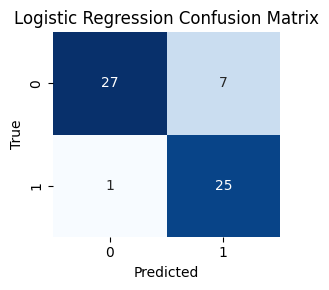


LDA:
  Training Accuracy: 0.84
  Test Accuracy:     0.88
  Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        34
           1       0.81      0.96      0.88        26

    accuracy                           0.88        60
   macro avg       0.89      0.89      0.88        60
weighted avg       0.90      0.88      0.88        60



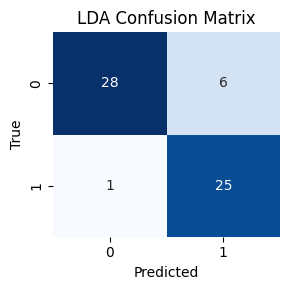


Linear SVM:
  Training Accuracy: 0.85
  Test Accuracy:     0.87
  Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.80      0.92      0.86        26

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.88      0.87      0.87        60



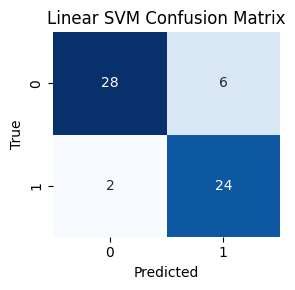

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1. Generate a synthetic dataset with two informative features.
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# 2. Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Initialize the models:
#    - Logistic Regression: Probabilistic outputs but can be sensitive to outliers.
#    - LDA: Closed-form solution; works well if Gaussian assumptions hold.
#    - Linear SVM: Maximizes the margin; robust decision boundaries.
lr = LogisticRegression()
lda = LDA()
svm = SVC(kernel='linear', probability=True)

models = {
    'Logistic Regression': lr,
    'LDA': lda,
    'Linear SVM': svm
}

# 4. Fit each model and evaluate both training and test performance.
print("=== Model Performance ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"\n{name}:")
    print(f"  Training Accuracy: {train_acc:.2f}")
    print(f"  Test Accuracy:     {test_acc:.2f}")
    print("  Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

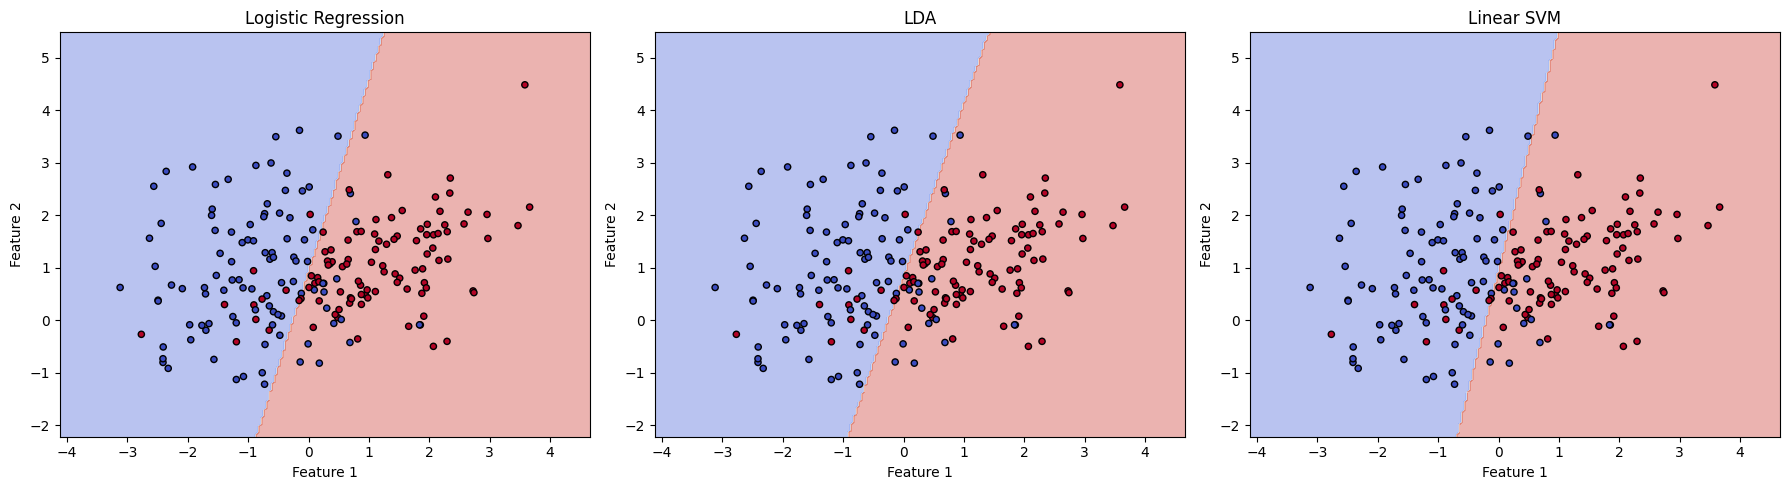

In [7]:
# 5. Function to plot decision boundaries.
def plot_decision_boundary(model, X, y, title, ax):
    # Define grid range.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict over the grid.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and training points.
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# Plot decision boundaries for all models.
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, model) in zip(axes, models.items()):
    plot_decision_boundary(model, X, y, name, ax)
plt.tight_layout()
plt.show()